In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [3]:
with open("./scripts/zlib-compr.yaml", "r") as file:
    data = yaml.safe_load(file)
data

{'system-info': {'stress-ng-version': '0.13.12',
  'run-by': 'root',
  'date-yyyy-mm-dd': 7283479,
  'time-hh-mm-ss': 45639,
  'epoch-secs': 1700386839,
  'hostname': 'alexey-ubuntu',
  'sysname': 'Linux',
  'nodename': 'alexey-ubuntu',
  'release': '6.2.0-36-generic',
  'version': '#37~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Oct  9 15:34:04 UTC 2',
  'machine': 'x86_64',
  'uptime': 13585,
  'totalram': 2046705664,
  'freeram': 566751232,
  'sharedram': 158896128,
  'bufferram': 122003456,
  'totalswap': 6337589248,
  'freeswap': 6119747584,
  'pagesize': 4096,
  'cpus': 8,
  'cpus-online': 8,
  'ticks-per-second': 100},
 'metrics': [{'stressor': 'zlib',
   'bogo-ops': 1936,
   'bogo-ops-per-second-usr-sys-time': 24.112592,
   'bogo-ops-per-second-real-time': 190.697025,
   'wall-clock-time': 10.15223,
   'user-time': 79.93,
   'system-time': 0.36,
   'cpu-usage-per-instance': 98.857594}]}

In [4]:
df = pd.read_csv('./csv/zlib-bogops.csv', delimiter=";")
df['sys+user'] = df['usr_time'] + df['sys_time']
df.head()

,zlib,bogo_ops,real_time,usr_time,sys_time,bogo_ops/s_real,bogo_ops/s_user+sys,CPU_used_per,sys+user
0,1,811,30.04,30.19,0.09,27.00,26.78,100.81,30.28
1,2,1767,30.06,60.39,0.35,58.78,29.09,101.03,60.74
2,3,2650,30.07,90.92,0.24,88.12,29.07,101.05,91.16
3,4,3392,30.21,121.81,0.47,112.27,27.74,101.18,122.28
4,5,4247,30.12,151.79,0.56,141.00,27.88,101.16,152.35


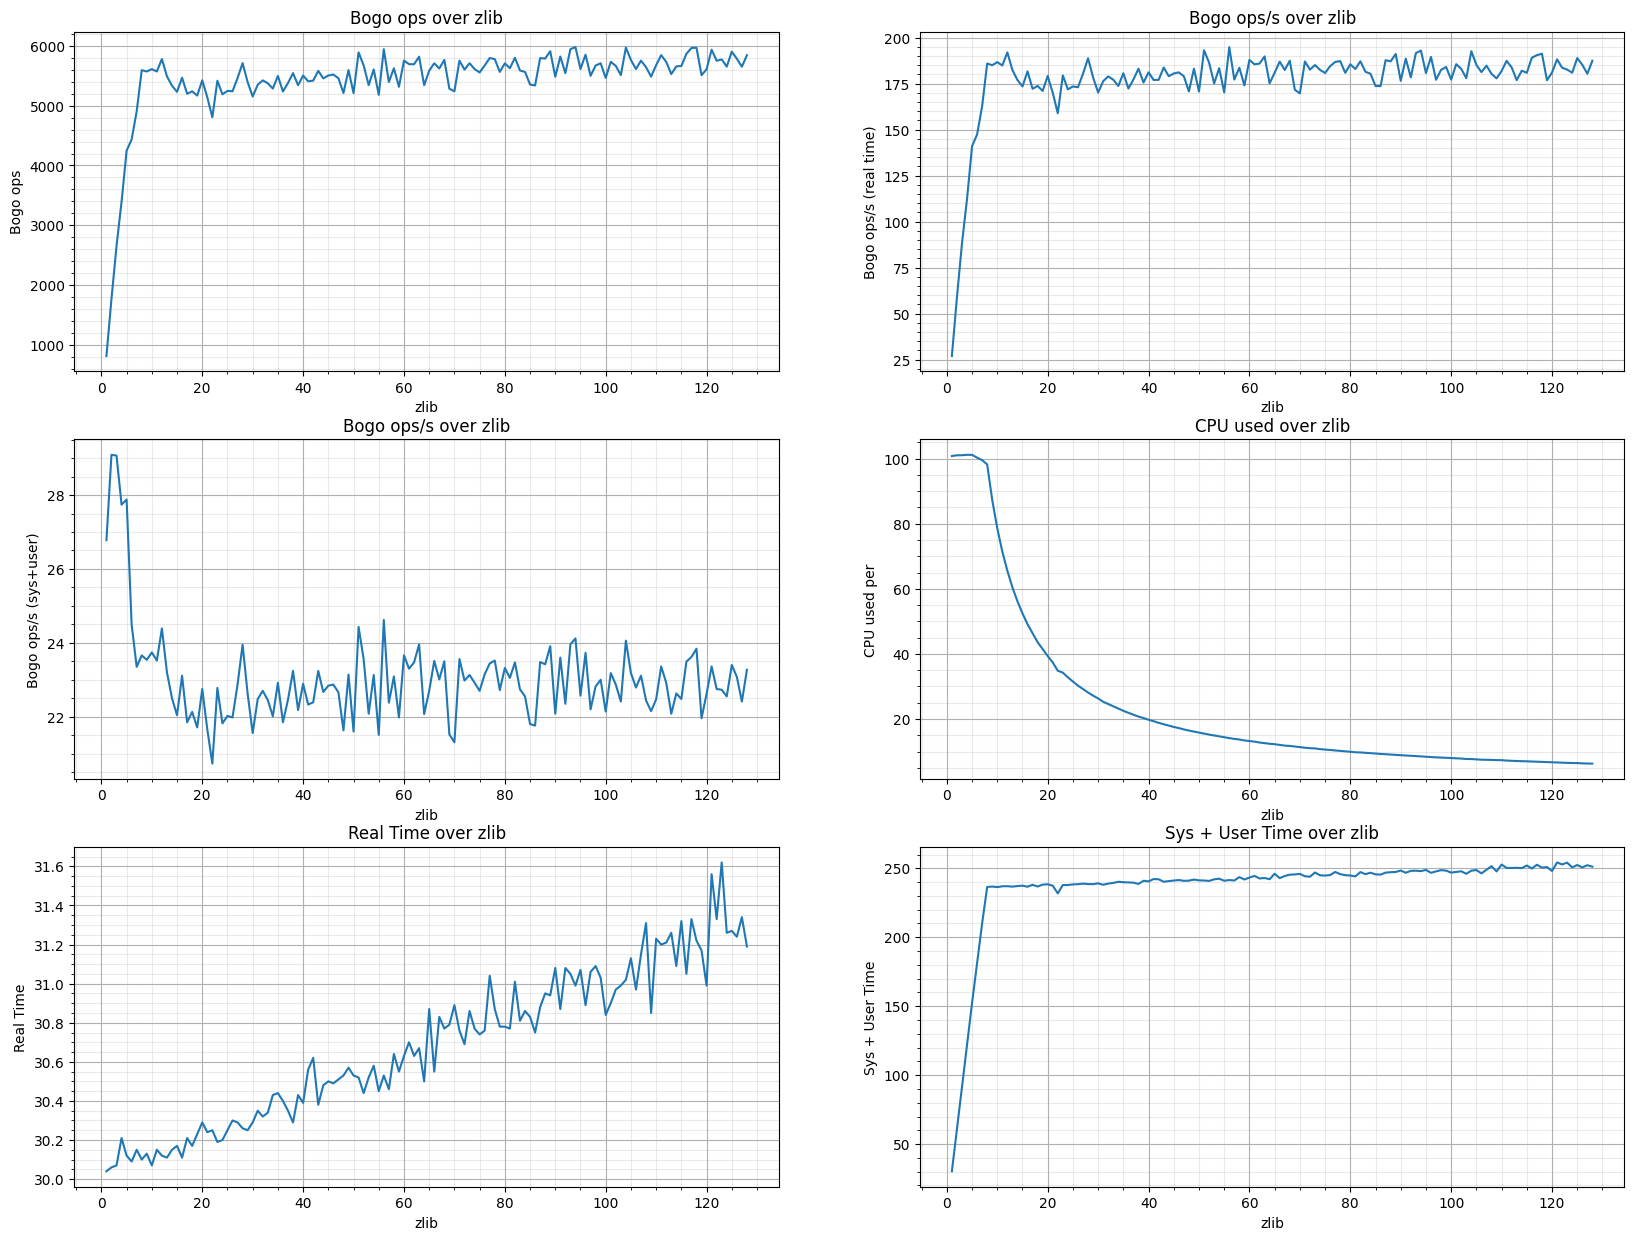

In [5]:
x_column = 'zlib'
fig, axs = plt.subplots(3, 2, figsize=(20,15))

axs[0,0].plot(df[x_column], df['bogo_ops'])
axs[0,0].set_xlabel(x_column)
axs[0,0].set_ylabel('Bogo ops')
axs[0,0].set_title('Bogo ops over ' + x_column)

axs[0,1].plot(df[x_column], df['bogo_ops/s_real'])
axs[0,1].set_xlabel(x_column)
axs[0,1].set_ylabel('Bogo ops/s (real time)')
axs[0,1].set_title('Bogo ops/s over ' + x_column)

axs[1,0].plot(df[x_column], df['bogo_ops/s_user+sys'])
axs[1,0].set_xlabel(x_column)
axs[1,0].set_ylabel('Bogo ops/s (sys+user)')
axs[1,0].set_title('Bogo ops/s over ' + x_column)

axs[1,1].plot(df[x_column], df['CPU_used_per'])
axs[1,1].set_xlabel(x_column)
axs[1,1].set_ylabel('CPU used per')
axs[1,1].set_title('CPU used over ' + x_column)

axs[2,0].plot(df[x_column], df['real_time'])
axs[2,0].set_xlabel(x_column)
axs[2,0].set_ylabel('Real Time')
axs[2,0].set_title('Real Time over ' + x_column)

axs[2,1].plot(df[x_column], df['sys+user'])
axs[2,1].set_xlabel(x_column)
axs[2,1].set_ylabel('Sys + User Time')
axs[2,1].set_title('Sys + User Time over ' + x_column)

for i in range(3):
    for j in range(2):
        axs[i,j].grid(True)
        axs[i,j].minorticks_on()
        axs[i,j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)

plt.savefig('./image/zlib-bogops.png')
plt.show()

In [8]:
df = pd.read_csv('./csv/zlib-mem-level-compr-2.csv', delimiter=";")
df

,level,compress,mb/s
0,1,56.42,0.88
1,1,53.97,1.01
2,1,58.42,1.04
3,1,56.13,0.93
4,1,62.11,0.94
...,...,...,...
85,9,57.18,1.60
86,9,54.50,1.73
87,9,57.66,1.66
88,9,57.54,1.97


In [18]:
group = df.groupby(by=["level"]).mean()
group

,compress,mb/s
level,,
1,57.934,1.002
2,56.289,1.232
3,55.789,1.457
4,55.385,1.638
5,55.904,1.786
6,54.036,1.693
7,55.057,1.949
8,55.091,2.035
9,56.456,1.918


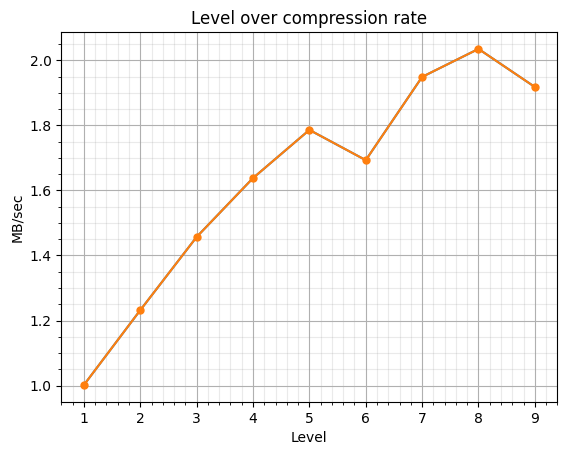

In [21]:
plt.plot(group['mb/s'])
plt.plot(group['mb/s'], marker='.', markersize=10)
plt.xlabel('Level')
plt.ylabel('MB/sec')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('Level over compression rate')
plt.savefig('./image/zsh-mem-level-compr.png')
plt.show()

In [27]:
df1 = pd.read_csv('./csv/fork-vm.csv', delimiter=";")
df2 = pd.read_csv('./csv/fork-vm-2.csv', delimiter=";")
df1

,free_fork
0,155048
1,153788
2,152780
3,151772
4,151772
...,...
174,136004
175,135756
176,135756
177,135532


In [28]:
df1['free_fork'] = df1['free_fork'] - df1['free_fork'].min()
df1

,free_fork
0,21284
1,20024
2,19016
3,18008
4,18008
...,...
174,2240
175,1992
176,1992
177,1768


In [29]:
df2['free'] = df2['free'] - df2['free'].min()
df2

,free
0,23916
1,23664
2,22908
3,22908
4,18636
...,...
175,3488
176,3240
177,3240
178,3240


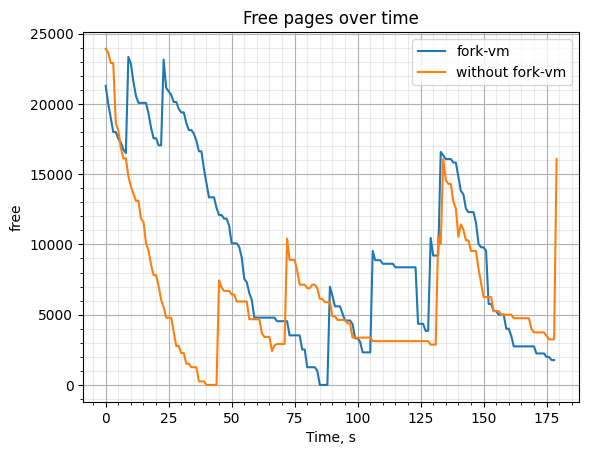

In [32]:
plt.plot(df1['free_fork'], label='fork-vm')
plt.plot(df2['free'], label='without fork-vm')
plt.xlabel('Time, s')
plt.ylabel('free')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('Free pages over time')
plt.savefig('./image/fork-vm.png')
plt.legend()
plt.show()